### Lab 2: Probability, Distributions, and Statistical Questions
#### Jennifer Vo, partners with William Olsen

#### Part 1

*Introduction here*

In [260]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

For this problem we are going to imagine that we are looking for gamma-ray sources (e.g. with the Fermi telescope). In this kind of telescope there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, you need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.

To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).

A) Show how the probability distribution of the background changes as you integrate (sum) for more days.

[0.1353352832366127, 0.2706705664732254, 0.2706705664732254, 0.18044704431548356, 0.09022352215774178, 0.03608940886309672, 0.012029802954365565, 0.0034370865583901616, 0.0008592716395975402, 0.00019094925324389823]


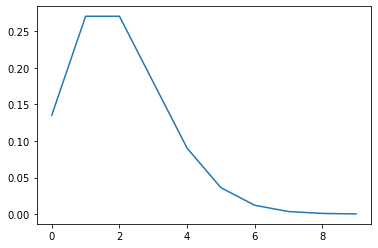

In [261]:
# Poisson lambda parameter = 2 rays/day
avg_bg = 2

# Gamma ray source average = 5 rays/day
avg_gr = 5

fig, ax = plt.subplots(1,1)
x_poisson = []
y_poisson = []
for i in range (0, 10):
    x_poisson.append(i)
    y_poisson.append(stats.poisson.pmf(i, avg_bg))

print(y_poisson)
plt.plot(x_poisson, y_poisson)
plt.show()

Observations here.

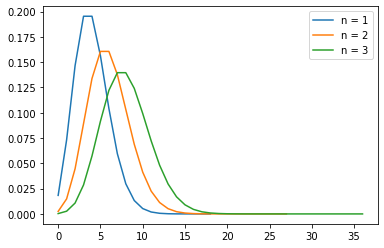

In [263]:
# n = number of convolutions
def convolve(n, p):
    conv_prob = p
    for i in range (0, n):
        conv_prob = np.convolve(conv_prob, p)
    
    size = len(conv_prob)
    x_values = []
    for i in range (0, size):
        x_values.append(i)
        
    return x_values, conv_prob

x_values1, conv_prob1 = convolve(1, y_poisson)
x_values2, conv_prob2 = convolve(2, y_poisson)
x_values3, conv_prob3 = convolve(3, y_poisson)

plt.plot(x_values1, conv_prob1, label = f'n = 1')
plt.plot(x_values2, conv_prob2, label = f'n = 2')
plt.plot(x_values3, conv_prob3, label = f'n = 3')

plt.legend()
plt.show()

Observations here.

B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

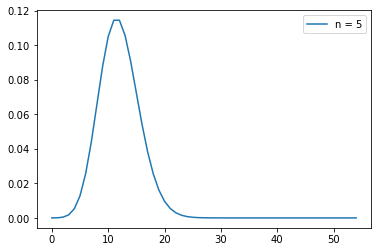

In [264]:
x_values5, conv_prob5 = convolve(5, y_poisson)
plt.plot(x_values5, conv_prob5, label = f'n = 5')
plt.legend()
plt.show()

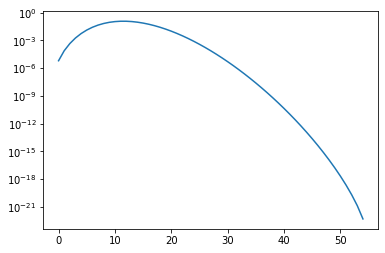

In [265]:
# Plot on a semi-log graph to see the distribution shape
plt.plot(x_values5, conv_prob5, label = f'n = {5}')
plt.yscale('log')
plt.show()

Observations and explanation.

C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

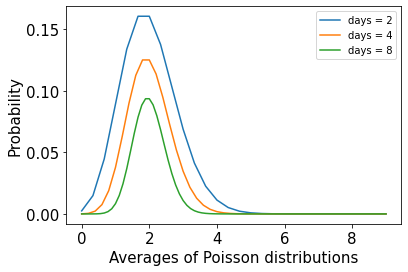

In [279]:
def avg_dist(n, p):
    x_values, conv_prob = convolve(n, p)
    
    size = len(conv_prob)
    x_avg = []
    for i in range (0, size):
        x_avg.append(x_values[i]/(n+1))
    
    return x_avg, conv_prob

x_avg2, conv_prob2 = avg_dist(2, y_poisson)
x_avg4, conv_prob4 = avg_dist(4, y_poisson)
x_avg8, conv_prob8 = avg_dist(8, y_poisson)

plt.plot(x_avg2, conv_prob2, '-', label = f'days = 2')
plt.plot(x_avg4, conv_prob4, '-', label = f'days = 4')
plt.plot(x_avg8, conv_prob8, '-', label = f'days = 8')

plt.tick_params(labelsize = 15)
plt.xlabel('Averages of Poisson distributions', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.legend()
plt.show()

Make observations:
- width decreases (by how much?)
- peak stays the same
- mean value decreases

In [229]:
# Calculation of standard deviation
# def calc_exp_value(x, y, p):
#     exp_value = 0
#     size = len(x)
#     bin_width = (x[size-1]-x[0])/size
#     for i in range (0, len(x)):
#         exp_value += y[i]*(x[i]*bin_width)**p
#     return exp_value

# def calc_std_dev(x, y):
#     mean = calc_exp_value(x, y, 1)
#     exp_xsq = calc_exp_value(x, y, 2)
#     var = exp_xsq - mean**2
#     std_dev = var**0.5
#     return std_dev

# std_dev_2 = calc_std_dev(avg_dist(2), conv_poisson)
# std_dev_4 = calc_std_dev(avg_dist(4), conv_poisson)
# std_dev_8 = calc_std_dev(avg_dist(8), conv_poisson)

# print(f'The standard deviation for the 2 day average Poisson distribution is {std_dev_2:.4f}')
# print(f'The standard deviation for the 4 day average Poisson distribution is {std_dev_4:.4f}')
# print(f'The standard deviation for the 8 day average Poisson distribution is {std_dev_8:.4f}')

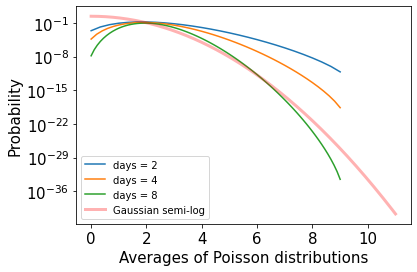

In [280]:
# Plot semi-log graphs for days = 2, 4, 8

plt.plot(x_avg2, conv_prob2, '-', label = f'days = 2')
plt.plot(x_avg4, conv_prob4, '-', label = f'days = 4')
plt.plot(x_avg8, conv_prob8, '-', label = f'days = 8')

x_gauss = np.linspace(0,11,1000)
y_gauss = 5*stats.norm.pdf(x_gauss, loc=0, scale = 1/1.25)
plt.plot(x_gauss, y_gauss, 'r', linewidth = 3, alpha = 0.3, label = 'Gaussian semi-log')

plt.tick_params(labelsize = 15)
plt.xlabel('Averages of Poisson distributions', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.yscale('log')
plt.legend()
plt.show()

The days = 2 semi-log plot looks like what I expected, a shape similar to the 5-day average distribution in part B.

As the number of days we average over increases from 2 to 8 however, the shape of the distribution becomes narrower. When we plot these distributions on a semi-log plot, I observe that it becomes more and more similar to an upside-down parabola, characteristic of a Gaussian. If I plot the Gaussian semi-log plot on here too, I see that..

D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.

Recall that my original source has an average of 5 gamma rays/day, and the background noise (Poisson distributed) averages 2 rays/day.

Let's look at the case of taking measurements over multiple days. Say we take measurements over N = 3 days, and during this time I record Y x N = 3*10 = 30 gamma rays from my source. What would the 'sigma' of my observation be?

"What is the probability of the background giving me a data point that looks as signal like or more than the measurement I have?"

In [206]:
# TO DO:
# Ask a specific question
# Convert to a mathematical expression
    # Determine pdf of background
    # Determine how to integrate pdf to obtain the probability that the background produced a signal as signal-like or more than your candidate.
# Finally, convert the probability to a sigma
# Need to convolve Poisson 3 days, use the probability distribution that results, find the probability associated 

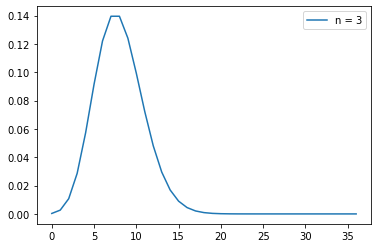

In [281]:
x_conv3, conv_prob3 = convolve(3, y_poisson)

plt.plot(x_conv3, conv_prob3, label = f'n = 3')
plt.legend()
plt.show()

In [282]:
# TO DO: FIGURE OUT HOW TO INTEGRATE PDF TO OBTAIN PROBABILITY.
# Expected value of poisson = variance = lambda parameter
def calc_exp_value(x, y, p):
    exp_value = 0
    size = len(x)
    bin_width = (x[size-1]-x[0])/size
    for i in range (0, len(x)):
        exp_value += y[i]*(x[i]*bin_width)**p
    return exp_value

exp_poisson3 = calc_exp_value(x_conv3, conv_poisson3, 1)

prob_conv3 = stats.poisson.cdf(30, exp_poisson3)
print(prob_conv3)
sigma_conv3 = stats.norm.ppf(prob_conv3)
print(f'The probability that the background gave me a data point that looks as signal-like or more than 30 gamma rays is {1-prob_conv3:.15f}.')
print(f'This corresponds to a sigma for my observation of {sigma_conv3:.2f}.')

0.9999999997198914
The probability that the background gave me a data point that looks as signal-like or more than 30 gamma rays is 0.000000000280109.
This corresponds to a sigma for my observation of 6.20.


#### Part 2

Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.
A) Show how the distribution changes as you average over more observing intervals.

Let's consider a skewed continuous distribution, an exponential distribution with parameter $\lambda$ = 2, as the background over some observing interval. Let's first determine how the distribution changes as we average over more observing intervals.

To do this, we will first take the convolution of this exponential distribution with itself, n number of times, then rescale the x-axis by 1/n to find the average.

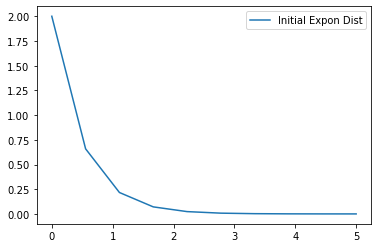

In [283]:
x_expon = np.linspace(0, 5, 10)
y_expon = stats.expon.pdf(x_expon, scale = 1/2)

plt.plot(x_expon, y_expon, label = 'Initial Expon Dist')
plt.legend()
plt.show()

19


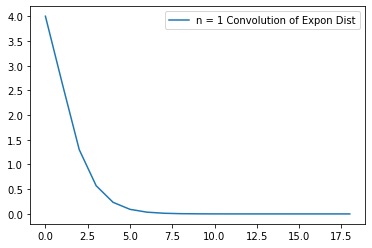

In [290]:
y_conv_expon = np.convolve(y_expon, y_expon)

size = len(y_conv_expon)
print(size)
x_conv_expon = []
for i in range (0, size):
    x_conv_expon.append(i)

plt.plot(x_conv_expon, y_conv_expon, label = f'n = 1 Convolution of Expon Dist')
plt.legend()
plt.show()

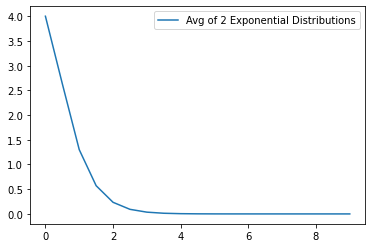

In [291]:
x_avg_expon = []
for i in range(0, len(y_conv_expon)):
    x_avg_expon.append(x_conv_expon[i]/2)

plt.plot(x_avg_expon, y_conv_expon, label = f'Avg of 2 Exponential Distributions')
plt.legend()
plt.show()

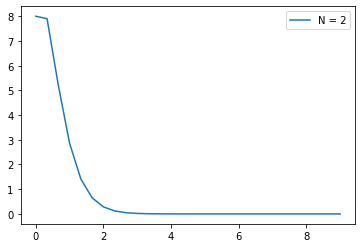

In [288]:
def avg_dist(n, p):
    x_values, conv_prob = convolve(n, p)
    
    size = len(conv_prob)
    x_avg = []
    for i in range (0, size):
        x_avg.append(x_values[i]/(n+1))
    
    return x_avg, conv_prob

# Plot multiple averages
x_avg_expon_2, y_conv_expon = avg_dist(2, y_expon)
# x_avg4, y_avg4 = avg_dist(4, y_expon)
# x_avg8, y_avg8 = avg_dist(8, y_expon)

plt.plot(x_avg_expon_2, y_conv_expon, '-', label = f'N = 2')
# plt.plot(x_avg4, y_avg4, '-', label = f'n = 4')
# plt.plot(x_avg8, y_avg8, '-', label = f'n = 8')
plt.legend()
plt.show()

B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?